In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [ ]:
ls

drive/  Mecab-ko-for-Google-Colab/  sample_data/


In [ ]:
cd Mecab-ko-for-Google-Colab/

/content/Mecab-ko-for-Google-Colab


In [ ]:
ls

images/                                    LICENSE
install_mecab-ko_on_colab190912.sh         README.md
install_mecab-ko_on_colab_light_210108.sh


In [ ]:
!bash install_mecab-ko_on_colab190912.sh #기터브에서 불러와 다운받는법

Installing konlpy.....
     |████████████████████████████████| 19.4MB 168kB/s 
     |████████████████████████████████| 450kB 49.4MB/s 
     |████████████████████████████████| 92kB 14.1MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-07-07 05:05:17--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c3:9b0a, 2406:da00:ff00::22c2:513, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=4Av9YGryflpJrYBhzDwpDHtrGJ8%3D&Expires=1625635254&AWSAccessKeyId=AKIA6KOSE3BNJ

In [ ]:
!pip install konlpy

In [ ]:
from konlpy.tag import Mecab

In [ ]:
mecab = Mecab()

In [ ]:
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [ ]:
!pwd #현재위치

/content/Mecab-ko-for-Google-Colab


In [ ]:
cd ../

/content


In [ ]:
path_to_file='/content/drive/MyDrive/dataset/혜림강사/korean-english-park.train.ko'

In [ ]:
with open(path_to_file, "r", encoding="UTF-8") as f:  #이렇게도 파일을 열수가 있구나
  raw = f.read().splitlines()

In [ ]:
print("Data Szie", len(raw))
print("Example")
for sen in raw[0:100][::20]: print(">>",sen)

Data Szie 94123
Example
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


In [ ]:
print(len(raw[3]))
print(type(raw))

90
<class 'list'>


In [ ]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
  length = len(sen)
  if min_len > length: min_len = length
  if max_len < length: max_len = length
  sum_len += length

print("문장의 최단 길이:",min_len)
print("문장의 최장 길이:",max_len)
print("문장의 평균 길이:",sum_len//len(raw))

문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


Text(0.5, 1.0, 'Sentence Length Distribution')

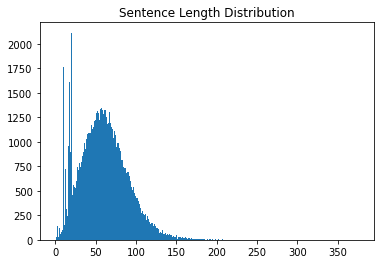

In [ ]:
sentence_length = np.zeros((max_len), dtype=np.int)
for sen in raw:
  sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")

In [ ]:
def check_sentence_with_length(raw, length): #문장이 
  count = 0
  for sen in raw:
    if len(sen) == length:
      print(sen)
      count += 1
      if count > 100: return

In [ ]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

In [ ]:
for idx, _sum in enumerate(sentence_length):
    if _sum > 1500:
        print("Outlier index: ", idx+1)

Outlier index:  11
Outlier index:  19
Outlier index:  21


In [ ]:
#중복제거하기
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))
print("Data Size : ", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length
    
print("문장의 최단 길이 : ", min_len)
print("문장의 최장 길이 : ", max_len)
print("문장의 평균 길이 : ", sum_len//len(cleaned_corpus))

Data Size :  77591
문장의 최단 길이 :  1
문장의 최장 길이 :  377
문장의 평균 길이 :  64


In [ ]:
check_sentence_with_length(cleaned_corpus, 11) #중복제거한후결과

standard 표준
Congress 의회
levee 제방, 둑
원문기사 원문기사보기
사업의) 합병, 합동
크라이슬러. 조업중단
조금은 새침한 샬롯？
tribunal 법정
하와이, 빅 아일랜드
비관적인, 염세주의의
라고 조던이 말했다.
미래의 최첨단 사무실
우리는 운이 좋았다.
meantime 한편
케냐 야생동물 고아원
폭탄테러가 공포 유발
- 네, 보이는군요.
대답은 다음과 같다.
스피어스가 뚱뚱한가?
(정당의) 원내 총무
천재 소녀의 '부활'
전유를 넣은 카페라떼
는 돌발질문을 했다.
그 이유는 간단하다.
- 모르고 있습니다.
원화 강세 언제까지?
정권을 잡다[장악하다
제발 답변을 주세요!
좀 더 말씀해주시죠.
pledge 서약하다
9. 몇 분간의 명상
그녀의 아름다운 눈.
"사과할 것이 없다.
키스를 잘 하는 방법
처음에는 장난이었다.
그들은 신중했습니다.
아기가 숨을 멈출 때
외교통상부 이슬람교도
미래 동맹 정책 구상
고 소식통이 전했다.
로그인 Korea사전
resign 사퇴하다
를 외치며 기뻐했다.
디즈니사만이 아니다.
경유 1200원대로…
산 위를 나는 느낌.
본서, 본부, 사령부
(아직 읽고있습니까?
건물 전체 무너져내려
이 일은 계속됩니다.
큰 파티는 아니지요.
brisk 활기를 띤
그는 "잘 모르겠다.
이전 보기 다음 보기
더 내려야 하는 이유
남한의 객관적 평가?
끌어내다, 철수시키다
이력서와 자기 소개서
raft 다수, 다량
대통령 후보자의 지명
시대가 변하고 있다.
의자는 비어 있었다.
작은 못이 아닙니다.
지하철 타기 겁난다.
나는 크게 실망했다.
세 시간쯤 걸었을까?
hearing 청문회


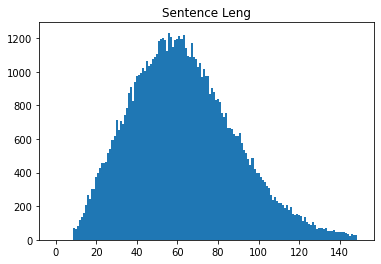

In [ ]:
#정제 후 결과
max_len = 150
min_len = 10

filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
  sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Leng")
plt.show()

## 공백 기반 토큰화

In [ ]:
def tokenize(corpus):
  import tensorflow as tf
  tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
  tokenizer.fit_on_texts(corpus)

  tensor = tokenizer.texts_to_sequences(corpus)
  tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding="post")
  return tensor, tokenizer

In [ ]:
# 정제된 데이터를 공백 기반으로 토큰화하여 저장하는 코드를 직접 작성해보세요~
split_corpus = []

for kor in filtered_corpus:
  split_corpus.append(kor.split())
  # 코드를 작성하세요.


# 나는 밥을 먹었다.
# 나는
# 밥을
# 먹었다
# ['나는', '밥을', '먹었다']

In [ ]:
split_tensor, split_tokenizer = tokenize(split_corpus)

In [ ]:
print("Split Vocab Size:", len(split_tokenizer.index_word))

Split Vocab Size: 237435


In [ ]:
split_tensor, split_tokenizer = tokenize(filtered_corpus)
print("Split Vocab Size:", len(split_tokenizer.index_word))

Split Vocab Size: 238086


In [ ]:
for idx, word in enumerate(split_tokenizer.word_index):
  print(idx, ":", word)

  if idx > 10: break

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


## 밝 + 혔다 // 밝+히다, 밝+다

## 형태소 토큰화

In [ ]:
def mecab_split(sentence):
    
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))

mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)
print("MeCab Vocab Size :", len(mecab_tokenizer.index_word))

MeCab Vocab Size : 52279


## Decoding (Detokenizer)

1. tokenizer.sequences_to_texts() 함수를 사용하여 Decoding
2. tokenizer.index_word를 사용하여 Decoding
두 가지 방법을 사용하여 mecab_tensor[100]을 원문으로 되돌려 봅시다 
(여기서는 띄어쓰기는 고려하지 않습니다!)


In [ ]:
mecab_tensor

array([[ 555, 1107,   14, ...,    0,    0,    0],
       [   3,   33,  143, ...,    0,    0,    0],
       [  76,  101,   66, ...,    0,    0,    0],
       ...,
       [2493,  558,   15, ...,    0,    0,    0],
       [  96,   66,  424, ...,    0,    0,    0],
       [5748, 5765,  100, ...,    0,    0,    0]], dtype=int32)

In [ ]:
# Case 1 : mecab_tokenizer.sequences_to_texts()

text = mecab_tokenizer.sequences_to_texts(mecab_tensor)
text[100]

'캐서린 은 이 운동화 를 신고 축구 나 농구 를 했 으며 이 운동 화 로 그레이트 솔트레이크 를 건너 운동 화 안 에 브라인슈림프 ( brine shrimp ) 가 들어가 기 도 했 다 .'

In [ ]:
# Case 2 : tokenizer.index_word

sentence = " "
for w in mecab_tensor[100]:

  if w == 0: continue
  sentence += mecab_tokenizer.index_word[w]

print(sentence)

 캐서린은이운동화를신고축구나농구를했으며이운동화로그레이트솔트레이크를건너운동화안에브라인슈림프(brineshrimp)가들어가기도했다.


In [ ]:
#공백을 준것
# Case 2 : tokenizer.index_word

sentence = " "
for w in mecab_tensor[100]:

  if w == 0: continue
  sentence += mecab_tokenizer.index_word[w]+" "

print(sentence)

 캐서린 은 이 운동화 를 신고 축구 나 농구 를 했 으며 이 운동 화 로 그레이트 솔트레이크 를 건너 운동 화 안 에 브라인슈림프 ( brine shrimp ) 가 들어가 기 도 했 다 . 


## BPE Algorithm

In [ ]:
import re, collections

In [ ]:
num_merges = 10 # BPE를 몇 회 수행할 것지 정함.

In [ ]:
dictionary = {'l o w </w>' : 5,
              'l o w e r </w>' : 2,
              'n e w e s t </w>' : 6,
              'w i d e s t </w>' :3
}

- n - gram
- unigram
- bigram
- trigram

l o w e s t
l  
o  
w  
e  
s  
t  

In [ ]:
def get_stats(dictionary):
  # 유니그램의 pair들의 빈도수를 카운트
  pairs = collections.defaultdict(int)
  for word, freq in dictionary.items():
    symbols = word.split()
    for i in range(len(symbols)-1):
      pairs[symbols[i], symbols[i+1]] += freq
  print('현재 pair들의 빈도수 :', dict(pairs))
  return pairs

In [ ]:
def merge_dictionary(pair, v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]
    return v_out

In [ ]:
bpe_codes = {}
bpe_codes_reverse = {}
for i in range(num_merges):
  print(">> Step {0}".format(i+1))
  pairs = get_stats(dictionary)
  best = max(pairs, key=pairs.get)
  dictionary = merge_dictionary(best, dictionary)

  bpe_codes[best] = i
  bpe_codes_reverse[best[0] + best[1]] = best

  print("new merge: {}".format(best))
  print("dictionary: {}".format(dictionary))

>> Step 1
현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 8, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('e', 's'): 9, ('s', 't'): 9, ('t', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'e'): 3}
new merge: ('e', 's')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w es t </w>': 6, 'w i d es t </w>': 3}
>> Step 2
현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'es'): 6, ('es', 't'): 9, ('t', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'es'): 3}
new merge: ('es', 't')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w est </w>': 6, 'w i d est </w>': 3}
>> Step 3
현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est'): 6, ('est', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est'): 3}
new merge: ('est', '</w>')
dictiona

In [ ]:
print(bpe_codes)

{('e', 's'): 0, ('es', 't'): 1, ('est', '</w>'): 2, ('l', 'o'): 3, ('lo', 'w'): 4, ('n', 'e'): 5, ('ne', 'w'): 6, ('new', 'est</w>'): 7, ('low', '</w>'): 8, ('w', 'i'): 9}


## OOV에 대처하기

In [ ]:
def get_pairs(word):
  pairs = set()
  prev_char = word[0]
  for char in word[1:]:
    pairs.add((prev_char, char))
    prev_char = char
  return pairs

In [ ]:
def encode(orig):
  word = tuple(orig) + ('</w>',)
  print("__word split into characters:__ <tt>{}<tt>".format(word))

  pairs = get_pairs(word)

  if not pairs:
    return orig
  
  iteration = 0
  while True:
    iteration += 1
    print("__Iteration {}:__".format(iteration))

    print("Bigram in the word: {}".format(pairs))
    bigram = min(pairs, key = lambda pair: bpe_codes.get(pair, float('inf')))
    print("candidate for merging: {}".format(bigram))
    if bigram not in bpe_codes:
      print("__Candidate not in BPE merges, algorithm stops.__")
      break
    first, second = bigram
    new_word = []
    i = 0
    while i < len(word):
      try:
        j = word.index(first, i)
        new_word.extend(word[i:j])
        i = j
      except:
        new_word.extend(word[i:])
        break

      if word[i] == first and i < len(word)-1 and word[i+1] == second:
        new_word.append(first+second)
        i += 2
      else:
        new_word.append(word[i])
        i += 1
    new_word = tuple(new_word)
    word = new_word
    print("word after merging : {}".format(word))
    if len(word) == 1:
      break
    else:
      pairs = get_pairs(word)
  
  # 특별토큰인 </w>는 출력하지 않는다.
  if word[-1] == '</w>':
    word = word[:-1]
  elif word[-1].endswith('</w>'):
    word = word[:-1] + (word[-1].replace('</w>', ''), )
  return word

In [ ]:
encode("lowest")

__word split into characters:__ <tt>('l', 'o', 'w', 'e', 's', 't', '</w>')<tt>
__Iteration 1:__
Bigram in the word: {('e', 's'), ('s', 't'), ('t', '</w>'), ('l', 'o'), ('o', 'w'), ('w', 'e')}
candidate for merging: ('e', 's')
word after merging : ('l', 'o', 'w', 'es', 't', '</w>')
__Iteration 2:__
Bigram in the word: {('es', 't'), ('t', '</w>'), ('w', 'es'), ('l', 'o'), ('o', 'w')}
candidate for merging: ('es', 't')
word after merging : ('l', 'o', 'w', 'est', '</w>')
__Iteration 3:__
Bigram in the word: {('w', 'est'), ('est', '</w>'), ('l', 'o'), ('o', 'w')}
candidate for merging: ('est', '</w>')
word after merging : ('l', 'o', 'w', 'est</w>')
__Iteration 4:__
Bigram in the word: {('w', 'est</w>'), ('l', 'o'), ('o', 'w')}
candidate for merging: ('l', 'o')
word after merging : ('lo', 'w', 'est</w>')
__Iteration 5:__
Bigram in the word: {('w', 'est</w>'), ('lo', 'w')}
candidate for merging: ('lo', 'w')
word after merging : ('low', 'est</w>')
__Iteration 6:__
Bigram in the word: {('low', 

('low', 'est')

In [ ]:
encode("highing")

__word split into characters:__ <tt>('h', 'i', 'g', 'h', 'i', 'n', 'g', '</w>')<tt>
__Iteration 1:__
Bigram in the word: {('i', 'n'), ('n', 'g'), ('h', 'i'), ('g', '</w>'), ('i', 'g'), ('g', 'h')}
candidate for merging: ('i', 'n')
__Candidate not in BPE merges, algorithm stops.__


('h', 'i', 'g', 'h', 'i', 'n', 'g')

사전에 없는 새로운단어가 나올때 이런식으로 계산이되는 구나정도만 알면된다.

## IMDB 리뷰 토큰화 하기

In [ ]:
import tensorflow_datasets as tfds
import urllib.request
import pandas as pd

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/LawrenceDuan/IMDb-Review-Analysis/master/IMDb_Reviews.csv", filename="IMDb_Reviews.csv")

('IMDb_Reviews.csv', <http.client.HTTPMessage at 0x7f077b373150>)

In [ ]:
train_df = pd.read_csv('IMDb_Reviews.csv')

In [ ]:
print(train_df)


                                                  review  sentiment
0      My family and I normally do not watch local mo...          1
1      Believe it or not, this was at one time the wo...          0
2      After some internet surfing, I found the "Home...          0
3      One of the most unheralded great works of anim...          1
4      It was the Sixties, and anyone with long hair ...          0
...                                                  ...        ...
49995  the people who came up with this are SICK AND ...          0
49996  The script is so so laughable... this in turn,...          0
49997  "So there's this bride, you see, and she gets ...          0
49998  Your mind will not be satisfied by this nobud...          0
49999  The chaser's war on everything is a weekly sho...          1

[50000 rows x 2 columns]


In [ ]:
train_df['review']

0        My family and I normally do not watch local mo...
1        Believe it or not, this was at one time the wo...
2        After some internet surfing, I found the "Home...
3        One of the most unheralded great works of anim...
4        It was the Sixties, and anyone with long hair ...
                               ...                        
49995    the people who came up with this are SICK AND ...
49996    The script is so so laughable... this in turn,...
49997    "So there's this bride, you see, and she gets ...
49998    Your mind will not be satisfied by this nobud...
49999    The chaser's war on everything is a weekly sho...
Name: review, Length: 50000, dtype: object

In [ ]:
train_df['sentiment']

0        1
1        0
2        0
3        1
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    1
Name: sentiment, Length: 50000, dtype: int64

In [ ]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(train_df['review'], target_vocab_size=2**13)

In [ ]:
print(tokenizer.subwords[:100])

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 't_', 'as_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', 'are_', ' (', 'have_', 'his_', 'film_', 'not_', 'be_', 'you_', 'ing_', ' "', 'ed_', 'it', 'd_', 'an_', 'at_', 'by_', 'he_', 'one_', 'who_', 'from_', 'y_', 'or_', 'e_', 'like_', 'all_', '" ', 'they_', 'so_', 'just_', 'has_', ') ', 'about_', 'her_', 'out_', 'This_', 'some_', 'movie', 'ly_', 'film', 'very_', 'more_', 'It_', 'what_', 'would_', 'when_', 'if_', 'good_', 'up_', 'which_', 'their_', 'only_', 'even_', 'my_', 'really_', 'had_', 'can_', 'no_', 'were_', 'see_', '? ', 'she_', 'than_', '! ', 'there_', 'been_', 'get_', 'into_', 'will_', ' - ', 'much_', 'n_', 'because_', 'ing']


In [ ]:
print(train_df['review'][20])

Pretty bad PRC cheapie which I rarely bother to watch over again, and it's no wonder -- it's slow and creaky and dull as a butter knife. Mad doctor George Zucco is at it again, turning a dimwitted farmhand in overalls (Glenn Strange) into a wolf-man. Unfortunately, the makeup is virtually non-existent, consisting only of a beard and dimestore fangs for the most part. If it were not for Zucco and Strange's presence, along with the cute Anne Nagel, this would be completely unwatchable. Strange, who would go on to play Frankenstein's monster for Unuiversal in two years, does a Lenny impression from "Of Mice and Men", it seems.<br /><br />*1/2 (of Four)


In [ ]:
print("토큰화된 샘플 질문: {}".format(tokenizer.encode(train_df['review'][20])))

토큰화된 샘플 질문: [1590, 4162, 132, 7107, 1892, 2983, 578, 76, 12, 4632, 3422, 7, 160, 175, 372, 2, 5, 39, 8051, 8, 84, 2652, 497, 39, 8051, 8, 1374, 5, 3461, 2012, 48, 5, 2263, 21, 4, 2992, 127, 4729, 711, 3, 1391, 8044, 3557, 1277, 8102, 2154, 5681, 9, 42, 15, 372, 2, 3773, 4, 3502, 2308, 467, 4890, 1503, 11, 3347, 1419, 8127, 29, 5539, 98, 6099, 58, 94, 4, 1388, 4230, 8057, 213, 3, 1966, 2, 1, 6700, 8044, 9, 7069, 716, 8057, 6600, 2, 4102, 36, 78, 6, 4, 1865, 40, 5, 3502, 1043, 1645, 8044, 1000, 1813, 23, 1, 105, 1128, 3, 156, 15, 85, 33, 23, 8102, 2154, 5681, 5, 6099, 8051, 8, 7271, 1055, 2, 534, 22, 1, 3046, 5214, 810, 634, 8120, 2, 14, 71, 34, 436, 3311, 5447, 783, 3, 6099, 2, 46, 71, 193, 25, 7, 428, 2274, 2260, 6487, 8051, 8, 2149, 23, 1138, 4117, 6023, 163, 11, 148, 735, 2, 164, 4, 5277, 921, 3395, 1262, 37, 639, 1349, 349, 5, 2460, 328, 15, 5349, 8127, 24, 10, 16, 10, 17, 8054, 8061, 8059, 8062, 29, 6, 6607, 8126, 8053]


In [ ]:
# 리뷰데이터가 아닌 샘플 문장으로 인코딩하고 디코딩해보자!!
sample_string = "It's mind-blowing to me that this film was even made."

# 인코딩해서 저장
tokenized_string = tokenizer.encode(sample_string)
print('정수 인코딩 후의 문장 {}'.format(tokenized_string))

# 이를 다시 디코딩하자
original_string = tokenizer.decode(tokenized_string)
print('기존 문장: {}'.format(original_string))

정수 인코딩 후의 문장 [137, 8051, 8, 910, 8057, 2169, 36, 7, 103, 13, 14, 32, 18, 79, 681, 8058]
기존 문장: It's mind-blowing to me that this film was even made.


In [ ]:
print('단어 집합의 크기(Vocab size) :', tokenizer.vocab_size)

단어 집합의 크기(Vocab size) : 8268


In [ ]:
for ts in tokenized_string:
  print('{} ----> {}'.format(ts, tokenizer.decode([ts])))

137 ----> It
8051 ----> '
8 ----> s 
910 ----> mind
8057 ----> -
2169 ----> blow
36 ----> ing 
7 ----> to 
103 ----> me 
13 ----> that 
14 ----> this 
32 ----> film 
18 ----> was 
79 ----> even 
681 ----> made
8058 ----> .


In [ ]:
sample_string = "It's mind-blowing to me that this film was evenxyz made."

# 인코딩해서 저장
tokenized_string = tokenizer.encode(sample_string)
print('정수 인코딩 후의 문장 {}'.format(tokenized_string))

# 이를 다시 디코딩하자
original_string = tokenizer.decode(tokenized_string)
print('기존 문장: {}'.format(original_string))

정수 인코딩 후의 문장 [137, 8051, 8, 910, 8057, 2169, 36, 7, 103, 13, 14, 32, 18, 7974, 8132, 8133, 997, 681, 8058]
기존 문장: It's mind-blowing to me that this film was evenxyz made.


In [ ]:
for ts in tokenized_string:
  print('{} ----> {}'.format(ts, tokenizer.decode([ts])))

137 ----> It
8051 ----> '
8 ----> s 
910 ----> mind
8057 ----> -
2169 ----> blow
36 ----> ing 
7 ----> to 
103 ----> me 
13 ----> that 
14 ----> this 
32 ----> film 
18 ----> was 
7974 ----> even
8132 ----> x
8133 ----> y
997 ----> z 
681 ----> made
8058 ----> .


## IMDB리뷰 sentencePiece로 토큰화

참고 : https://keep-steady.tistory.com/7?category=702926

In [ ]:
pip install sentencepiece

     |████████████████████████████████| 1.2MB 32.1MB/s 


In [ ]:
import sentencepiece as spm
import pandas as pd
import urllib.request
import csv

In [ ]:
train_df = pd.read_csv('IMDb_Reviews.csv')
train_df['review']

0        My family and I normally do not watch local mo...
1        Believe it or not, this was at one time the wo...
2        After some internet surfing, I found the "Home...
3        One of the most unheralded great works of anim...
4        It was the Sixties, and anyone with long hair ...
                               ...                        
49995    the people who came up with this are SICK AND ...
49996    The script is so so laughable... this in turn,...
49997    "So there's this bride, you see, and she gets ...
49998    Your mind will not be satisfied by this nobud...
49999    The chaser's war on everything is a weekly sho...
Name: review, Length: 50000, dtype: object

In [ ]:
print('리뷰 개수:',len(train_df))

리뷰 개수: 50000


In [ ]:
with open('imdb_review.txt', 'w', encoding = 'utf8') as f:
  f.write('\n'.join(train_df['review']))

In [ ]:
spm.SentencePieceTrainer.Train('--input=imdb_review.txt --model_prefix=imdb --vocab_size=5000 --model_type=bpe --max_sentence_length=9999')

- input : 학습시킬 파일
- model_prefix : 만들어질 모델 이름
- vocab_size : 단어집합크기
- model_type : 사용할 모델 (unigram(default), bpe, char, word)
- pad_id, pad_piece : pad token id, 값
- unk_id, unk_piece : unknown token id, 값
- bos_id, bos_piece : begin of sentence token id,값
- eos_id, eos_piece : end of sequence token id, 값
- user_defined_symbols : 사용자 정의 토큰

In [ ]:
vocab_list = pd.read_csv('imdb.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)
vocab_list.sample(10)

,0,1
4189,▁listen,-4186
4988,9,-4985
350,▁bet,-347
507,▁little,-504
2390,▁five,-2387
47,▁/,-44
2924,▁mel,-2921
4425,▁motiv,-4422
3609,▁burn,-3606
2914,sters,-2911


In [ ]:
len(vocab_list)

5000

In [ ]:
sp = spm.SentencePieceProcessor()
vocab_file = "imdb.model"
sp.load(vocab_file)

True

In [ ]:
lines = [
         "I didn't at all think of it this way.",
         "I have waited a long time for someone to film"
]
for line in lines:
  print(line)
  print(sp.encode_as_pieces(line)) # 문장을 입력하면 서브워드 시퀀스로 변환
  print(sp.encode_as_ids(line)) # 문장을 입력하면 정수 시퀀스로 변환
  print()

I didn't at all think of it this way.
['▁I', '▁didn', "'", 't', '▁at', '▁all', '▁think', '▁of', '▁it', '▁this', '▁way', '.']
[41, 623, 4950, 4926, 138, 169, 378, 30, 58, 73, 413, 4945]

I have waited a long time for someone to film
['▁I', '▁have', '▁wa', 'ited', '▁a', '▁long', '▁time', '▁for', '▁someone', '▁to', '▁film']
[41, 141, 1364, 1120, 4, 666, 285, 92, 1078, 33, 91]



In [ ]:
sp.GetPieceSize() #단어집합의 크기

5000

In [ ]:
sp.IdToPiece(430) #정수로부터 매핑되는 서브워드 변환

'▁character'

In [ ]:
sp.PieceToId('▁character') # 서브워드로부터 매핑되는 정수로 변환

430

In [ ]:
sp.DecodeIds([41, 141, 1364, 1120, 4, 666, 285, 92, 1078, 33, 91])
# 정수 시퀀스로부터 문장으로 변환

'I have waited a long time for someone to film'

In [ ]:
# 서브워드 시퀀스로부터 문장으로 변환
sp.DecodePieces(['▁I', '▁have', '▁wa', 'ited', '▁a', '▁long', '▁time', '▁for', '▁someone', '▁to', '▁film'])

'I have waited a long time for someone to film'

In [ ]:
print(sp.encode('I have waited a long time for someone to film', out_type=str))
print(sp.encode('I have waited a long time for someone to film', out_type=int))
# encode -> 문장으로부터 인자값에 따라서 정수 시퀀스 또는 서브워드 시퀀스로 변환 가능

['▁I', '▁have', '▁wa', 'ited', '▁a', '▁long', '▁time', '▁for', '▁someone', '▁to', '▁film']
[41, 141, 1364, 1120, 4, 666, 285, 92, 1078, 33, 91]
